In [2]:
# packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
# import du csv
data = pd.read_csv('heart.csv')

In [4]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,NaN,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [5]:
stat_analysis = ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

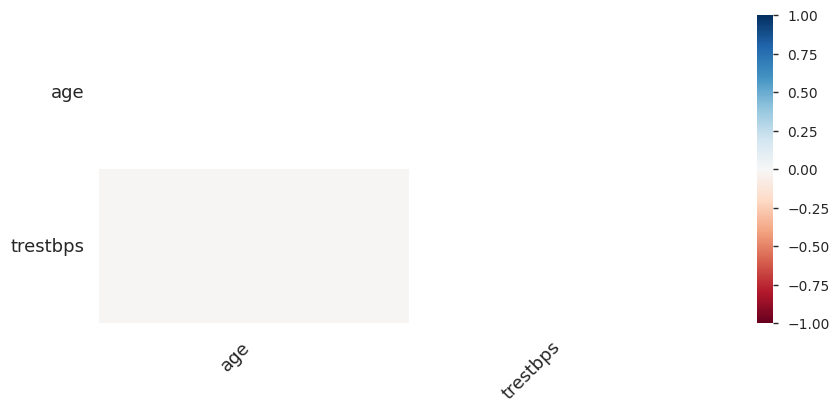

In [6]:
stat_analysis

In [7]:
# Count des valeurs
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [8]:
# Suppression des NaaN
data.dropna(inplace=True)



In [9]:
data['target'].value_counts()

target
1    520
0    481
Name: count, dtype: int64

In [10]:
data['age'] = data['age'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)

In [11]:
# Suppresion des colonnes inutiles
#data.drop(labels=['Name'], axis=1, inplace=True)

In [12]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Decision tree

In [210]:
# Définition du modèles
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=700)

# Appel de l'abre de décision
clf = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=80,
    min_samples_leaf=10,
    max_features='sqrt',
    criterion='gini',
    class_weight='balanced',  # ou 'balanced' pour le rééquilibrage des classes
    random_state=50
)

# Ajustement des doonées
clf = clf.fit(X_train, Y_train)


# Estimation du test
estimate = clf.predict_proba(X_test)[:,1]




true = Y_test
# build AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)

print(abs(estimate - true).mean())
print(abs(estimate - true).std())


0.2818517354965768
0.2668509506797453


In [211]:
#print(X_train)
#print(X_test)
#print(Y_train)
#print(Y_test)

In [212]:
print(auc_)

0.8643430610424365


L'AUC est proche de 0.5, il est peu informatif.

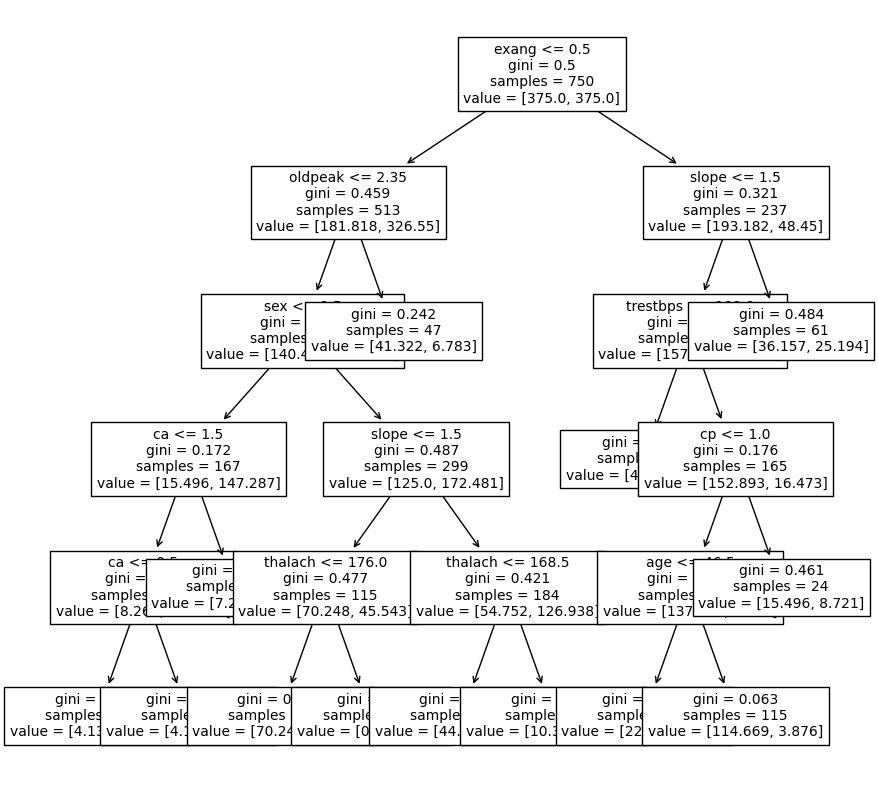

In [213]:
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

[Text(0.6323529411764706, 0.9166666666666666, 'x[8] <= 0.5\ngini = 0.5\nsamples = 750\nvalue = [375.0, 375.0]'),
 Text(0.38235294117647056, 0.75, 'x[9] <= 2.35\ngini = 0.459\nsamples = 513\nvalue = [181.818, 326.55]'),
 Text(0.3235294117647059, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.424\nsamples = 466\nvalue = [140.496, 319.767]'),
 Text(0.17647058823529413, 0.4166666666666667, 'x[11] <= 1.5\ngini = 0.172\nsamples = 167\nvalue = [15.496, 147.287]'),
 Text(0.11764705882352941, 0.25, 'x[11] <= 0.5\ngini = 0.11\nsamples = 146\nvalue = [8.264, 133.721]'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.071\nsamples = 116\nvalue = [4.132, 108.527]'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.242\nsamples = 30\nvalue = [4.132, 25.194]'),
 Text(0.23529411764705882, 0.25, 'gini = 0.454\nsamples = 21\nvalue = [7.231, 13.566]'),
 Text(0.47058823529411764, 0.4166666666666667, 'x[10] <= 1.5\ngini = 0.487\nsamples = 299\nvalue = [125.0, 172.481]'),
 Text(0.35294117647

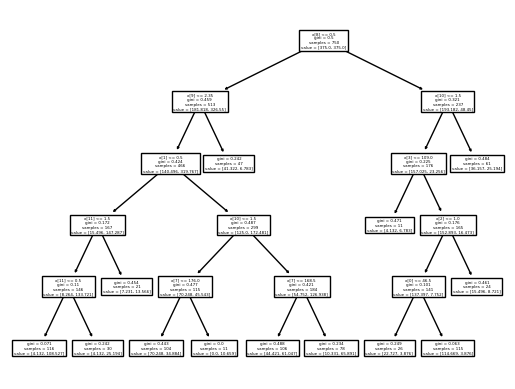

In [214]:
plot_tree(clf)

In [215]:
# creating features importance serie
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

exang       0.392717
oldpeak     0.164030
sex         0.136494
slope       0.125578
thalach     0.097413
trestbps    0.034603
cp          0.023980
ca          0.021778
age         0.003408
chol        0.000000
fbs         0.000000
restecg     0.000000
thal        0.000000
dtype: float64

In [216]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [20]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 0.01, 'random_state': 20}
best auc: 0.9988856792717088


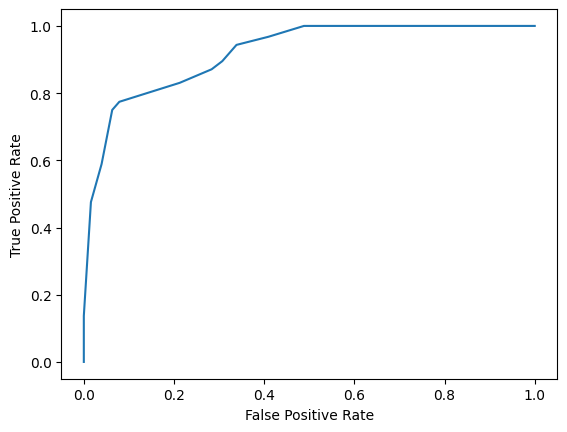

In [217]:
# Appel de la classification
clf_best = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_split = 0.07, random_state= 25)

# Définition des variable
Y = data['target']
X = data.drop(labels=['target'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [218]:
# auc
print(auc(fpr,tpr))



0.9197358394716789


L’AUC ROC de notre modèle se situe bien au-dessus de celui d’un modèle non-informatif et en-dessous de celui d’un modèle parfait. Avec 73% d’AUC ROC, il s’agit d’un modèle assez performant.

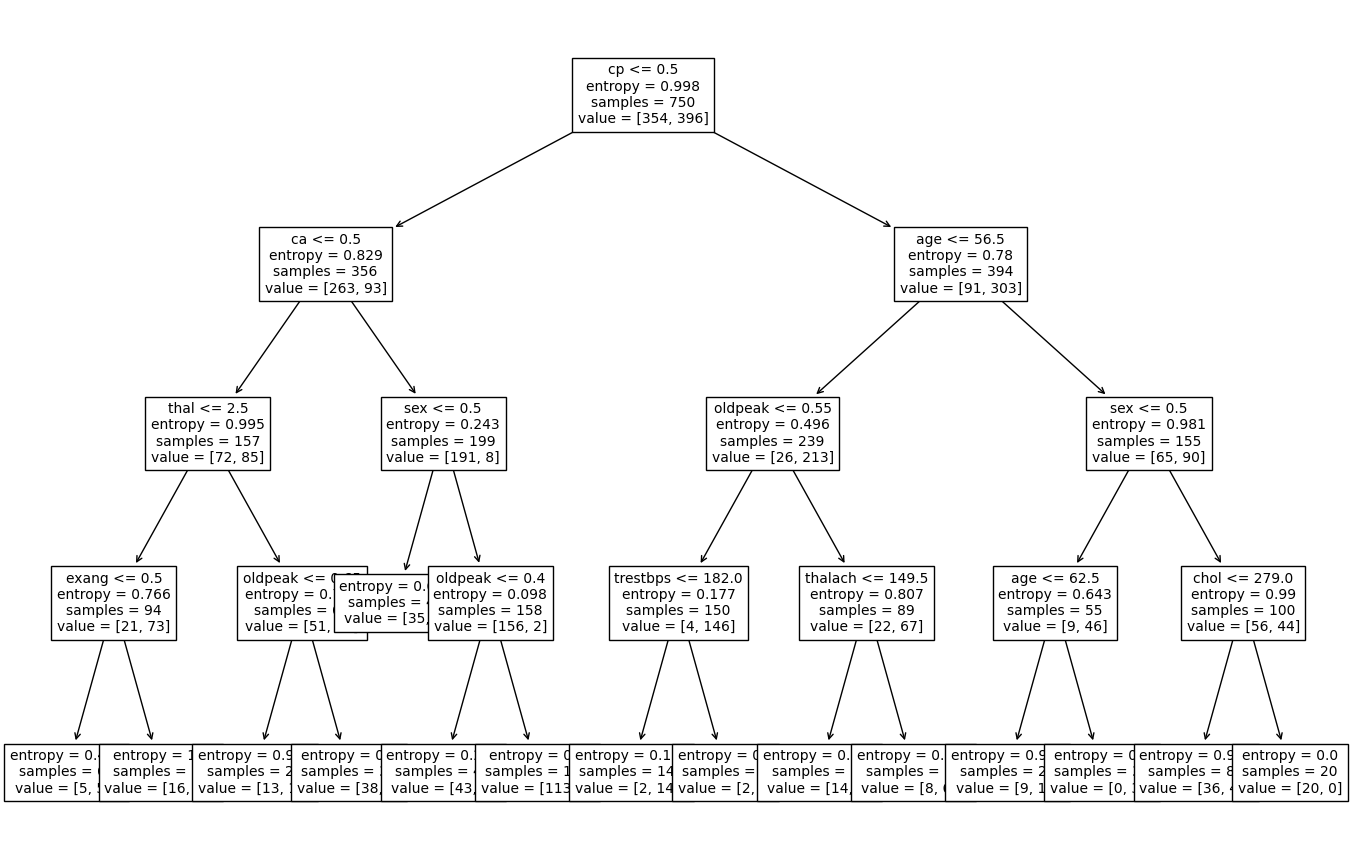

In [219]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf_best, feature_names = list(X_train.columns), fontsize=10)
plt.show()

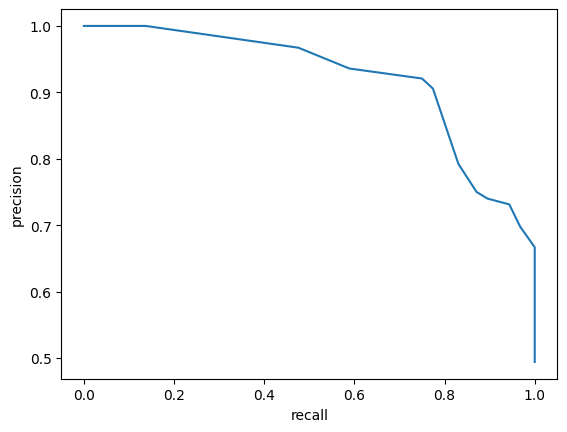

In [220]:
precision, recall, _ = precision_recall_curve(Y_test,  estimate_best)

# getting pr curve

plt.plot(recall, precision)

plt.ylabel('precision')
plt.xlabel('recall')
plt.show()


### Logistic regression

In [221]:
# calling classifier
clf_lr = LogisticRegression(solver='liblinear')

# fitting on data
clf_lr = clf_lr.fit(X_train, Y_train)
# estimating on test
estimate_lr = clf_lr.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
auc_lr = auc(fpr, tpr)

print(auc_lr) 

0.9126873253746508


In [222]:
rs = range(1000)
auc_list_lr = []
for random_state in rs:
    # model variables definitions
    Y = data['target']
    X = data.drop(labels=['target'], axis=1)

    # splitting into train test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=random_state)

    # calling decisiontree classifier
    clf_lr = LogisticRegression(solver='liblinear')
    #criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
    # fitting on data
    clf_lr = clf_lr.fit(X_train, Y_train)
    # estimating on test
    estimate_lr = clf_lr.predict_proba(X_test)[:,1]
    # AUC
    fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
    auc_lr = auc(fpr, tpr)
    auc_list_lr.append(auc_lr)

print(np.mean(auc_list_lr))

0.9153247136694819


### Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Définition du modèle Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=50)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

# Ajustement des données
clf_rf.fit(X_train, Y_train)

# Prédiction des probabilités pour la classe positive
estimate_rf = clf_rf.predict_proba(X_test)[:, 1]

# Calcul de l'AUC
fpr_rf, tpr_rf, _ = roc_curve(Y_test, estimate_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Autres métriques d'évaluation
predictions_rf = clf_rf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, predictions_rf))
print("Classification Report:\n", classification_report(Y_test, predictions_rf))
print("AUC:", auc_rf)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       123

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251

AUC: 1.0


### Cross Validation

In [224]:
auc_list = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.02)
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list.append(auc_cv)

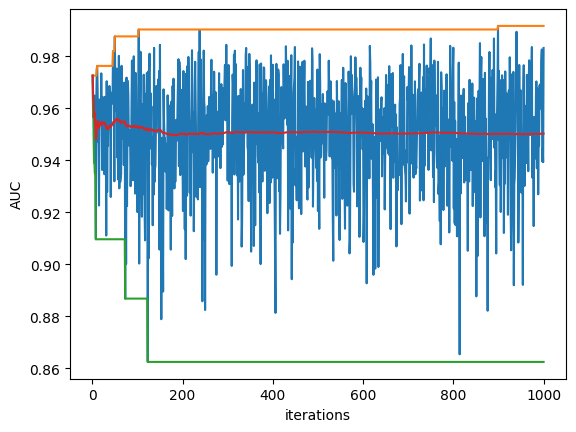

In [225]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list[:i+1]) for i in range(len(auc_list))]
cum_min_list = [min(auc_list[:i+1]) for i in range(len(auc_list))]
cum_mean_list = [np.mean(auc_list[:i+1]) for i in range(len(auc_list))]

plt.plot(iterations,auc_list)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()